# Togo EDA
Author: Robel Fikadu

Objective: 
- Profile dataset (missing values, summary stats)
- Detect outliers and clean (z-score, median impute)
- Time-series & relationship analysis for GHI/DNI/DHI and environmental variables
- Save cleaned dataset to data/cleaned/togo_clean.csv

## Load packages & data

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from src.data_pipeline import (
    load_data,
    convert_timestamp,
    detect_outliers_zscore,
    impute_missing_median,
    save_clean_data
)
%matplotlib inline

# load the dataset for sierraleone-bumbuna



try: 
    df = load_data("../data/raw/benin-malanville.csv")
    print(f"Successfully loaded")
except FileNotFoundError:
    print("Error: file not found. Make sure the file exists and the path is correct.")
    exit()

# Display basic information about the DataFrame
print("\nDataFrame Info:")
df.info()

print("\nFirst 5 rows of the dataset:")
df.head()


Successfully loaded

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Summary Statistics & Missing-Value Report

In [2]:
# --- Summary Statistics ---
print("\n--- Summary Statistics for Numeric Columns ---")
print(df.describe())

# --- Missing Values Report ---
print("\n--- Missing Values Count per Column ---")
missing_counts = df.isnull().sum()
print(missing_counts)

print("\n--- Percentage of Missing Values per Column ---")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# --- Columns with >5% Missing Values ---
print("\n--- Columns with >5% Missing Values ---")
cols_with_high_missing = missing_percentage[missing_percentage > 5].index.tolist()
if cols_with_high_missing:
    print(f"Columns with more than 5% missing values: {cols_with_high_missing}")
else:
    print("No columns with more than 5% missing values.")




--- Summary Statistics for Numeric Columns ---
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000    

## Outlier Detection & Basic Cleaning

In [3]:

# --- Outlier Detection ---
zscore_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

df, outlier_summary = detect_outliers_zscore(df, zscore_cols)

print("\n--- Outlier Summary (|Z| > 3) ---")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

# --- Timestamp Conversion ---
df = convert_timestamp(df, 'Timestamp')

# --- Median Imputation ---
columns_to_impute_median = [
    'GHI','DNI','DHI','ModA','ModB','Tamb','RH','WS','WSgust',
    'WD','BP','Precipitation','TModA','TModB'
]
df = impute_missing_median(df, columns_to_impute_median)

print("\nMissing values after median imputation:")
print(df[columns_to_impute_median].isnull().sum())

# --- Save Cleaned Dataset ---
output_path = "../data/cleaned/bennin.csv"
save_clean_data(df, output_path)
print(f"\n✅ Cleaned data saved to: {output_path}")






--- Outlier Summary (|Z| > 3) ---
GHI: 89 outliers
DNI: 0 outliers
DHI: 3738 outliers
ModA: 27 outliers
ModB: 63 outliers
WS: 3109 outliers
WSgust: 3500 outliers

Missing values after median imputation:
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WD               0
BP               0
Precipitation    0
TModA            0
TModB            0
dtype: int64

✅ Cleaned data saved to: ../data/cleaned/bennin.csv


## Time Seried Analysis


--- Time Series Analysis ---


KeyboardInterrupt: 

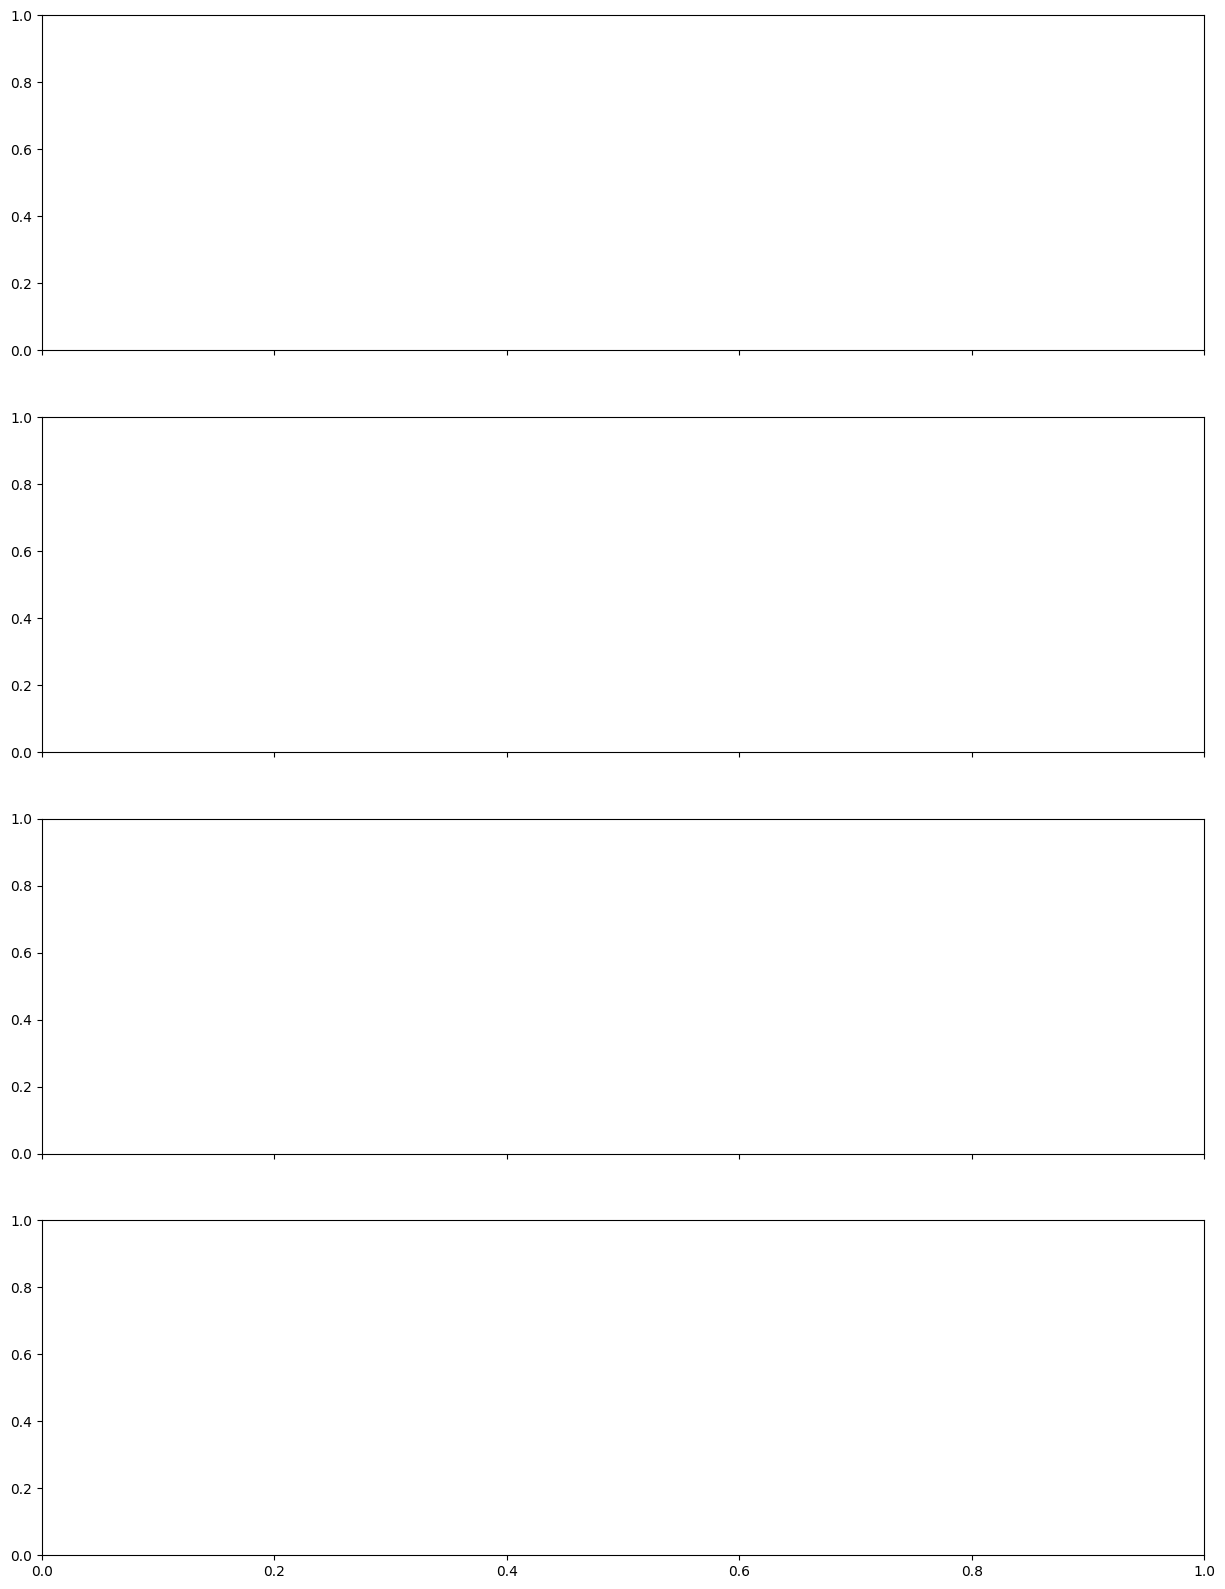

In [4]:
print("\n--- Time Series Analysis ---")

# Ensures Timestamp is set as index for easier time series plotting
df_ts = df.set_index('Timestamp').copy()

# Plotting GHI, DNI, DHI, Tamb over time
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)
sns.lineplot(data=df_ts, x=df_ts.index, y='GHI', ax=axes[0], label='GHI').set_title('GHI Over Time')
sns.lineplot(data=df_ts, x=df_ts.index, y='DNI', ax=axes[1], label='DNI', color='orange').set_title('DNI Over Time')
sns.lineplot(data=df_ts, x=df_ts.index, y='DHI', ax=axes[2], label='DHI', color='green').set_title('DHI Over Time')
sns.lineplot(data=df_ts, x=df_ts.index, y='Tamb', ax=axes[3], label='Ambient Temp', color='red').set_title('Ambient Temperature Over Time')

plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Observing patterns (e.g., daily/monthly averages)
print("\n--- Average Daily and Monthly Patterns ---")

# Hourly average of GHI
df['Hour'] = df['Timestamp'].dt.hour
hourly_ghi = df.groupby('Hour')['GHI'].mean()
plt.figure(figsize=(10, 5))
hourly_ghi.plot(kind='bar')
plt.title('Average GHI by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average GHI (W/m²)')
plt.show()

# Monthly average of GHI
df['Month'] = df['Timestamp'].dt.month
monthly_ghi = df.groupby('Month')['GHI'].mean()
plt.figure(figsize=(10, 5))
monthly_ghi.plot(kind='bar')
plt.title('Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Cleaning Impact


--- Cleaning Impact Analysis ---
                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


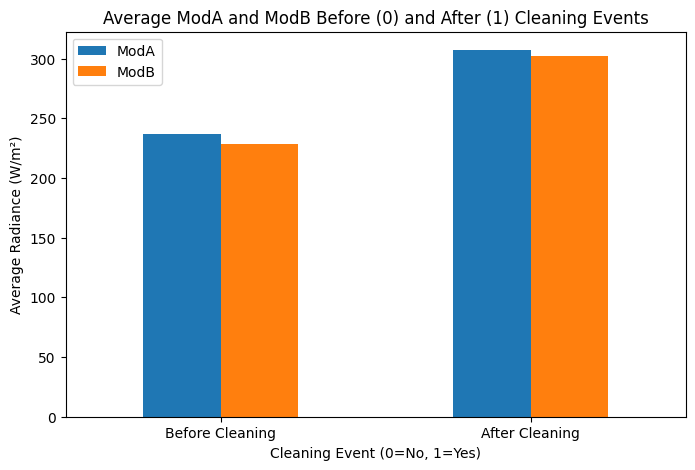

In [5]:
print("\n--- Cleaning Impact Analysis ---")

# Ensures 'Cleaning' column is treated as categorical if needed, though 0/1 is fine for grouping
# Group by 'Cleaning' flag and calculate mean ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_impact)

# Plotting the impact
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB Before (0) and After (1) Cleaning Events')
plt.xlabel('Cleaning Event (0=No, 1=Yes)')
plt.ylabel('Average Radiance (W/m²)')
plt.xticks(ticks=[0, 1], labels=['Before Cleaning', 'After Cleaning'], rotation=0)
plt.show()


## Correlation & Relationship Analysis


--- Correlation & Relationship Analysis ---


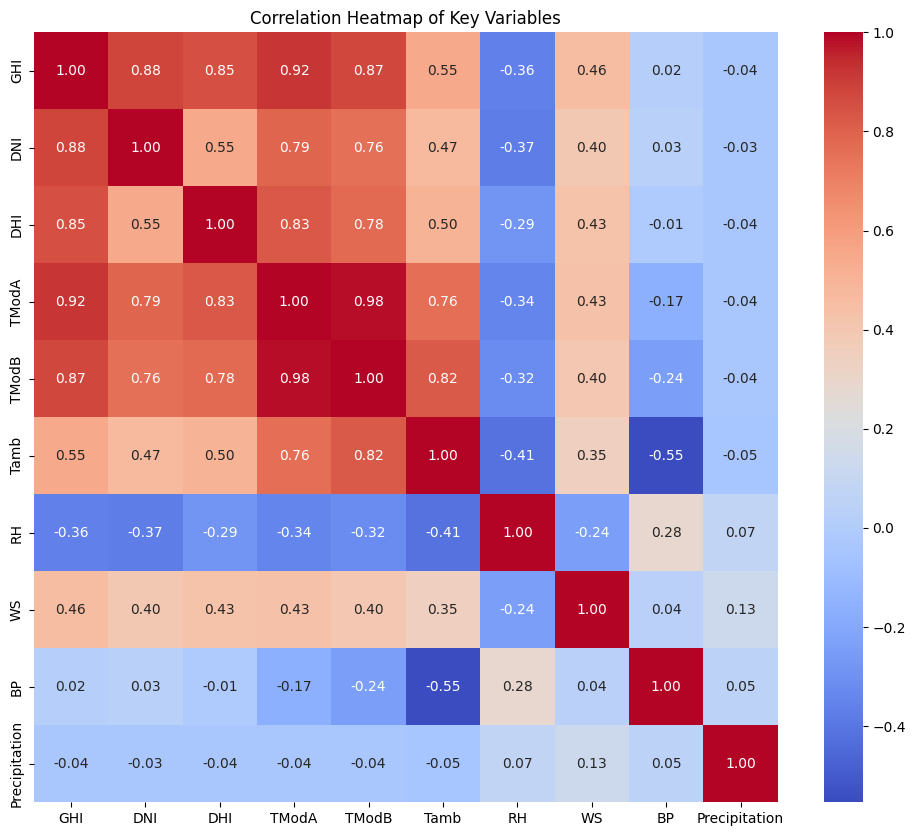


--- Scatter Plots for Relationships ---


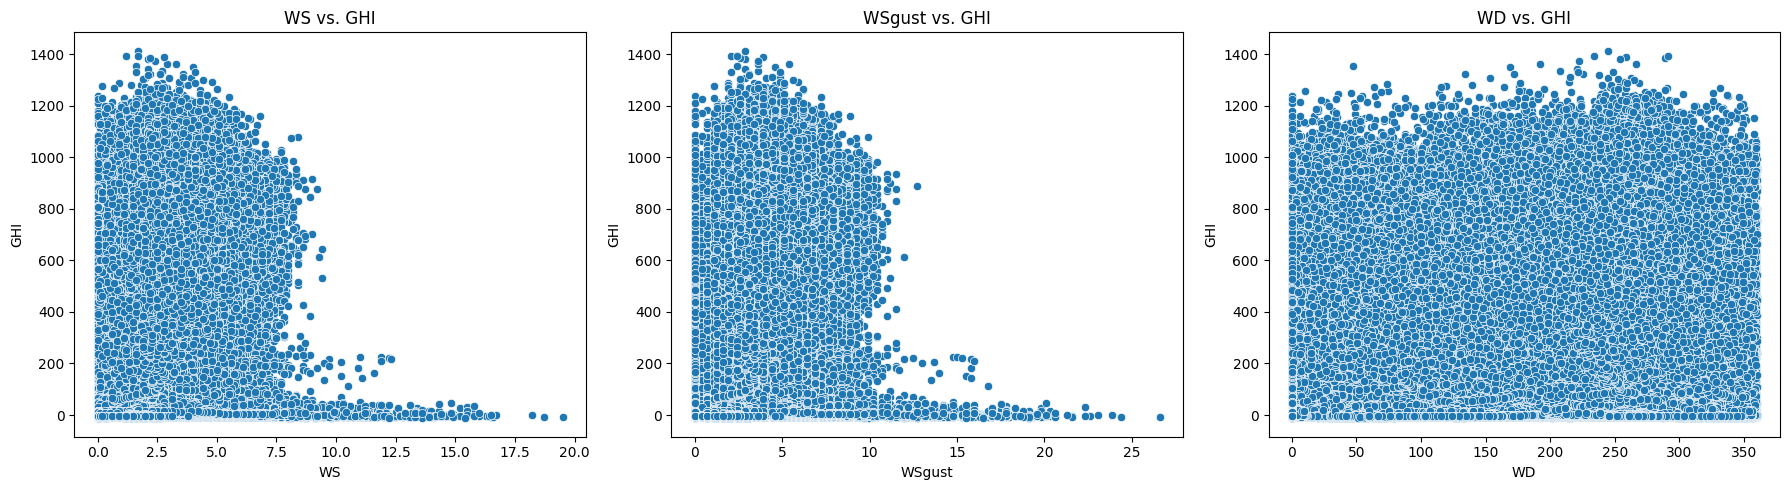

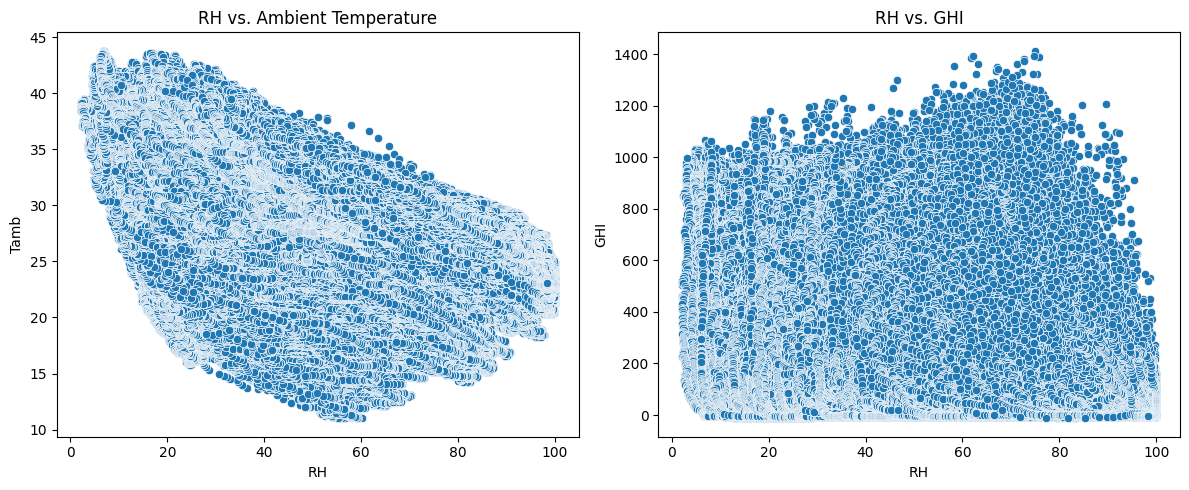

In [6]:
print("\n--- Correlation & Relationship Analysis ---")

correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'BP', 'Precipitation']
# Filter out columns that might not exist in the DataFrame
correlation_cols = [col for col in correlation_cols if col in df.columns]

# --- Heatmap of Correlations ---
plt.figure(figsize=(12, 10))
sns.heatmap(df[correlation_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Variables')
plt.show()

# --- Scatter Plots ---
print("\n--- Scatter Plots for Relationships ---")

# WS, WSgust, WD vs. GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x='WS', y='GHI', ax=axes[0]).set_title('WS vs. GHI')
sns.scatterplot(data=df, x='WSgust', y='GHI', ax=axes[1]).set_title('WSgust vs. GHI')
sns.scatterplot(data=df, x='WD', y='GHI', ax=axes[2]).set_title('WD vs. GHI')
plt.tight_layout()
plt.show()

# RH vs. Tamb or RH vs. GHI
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='RH', y='Tamb', ax=axes[0]).set_title('RH vs. Ambient Temperature')
sns.scatterplot(data=df, x='RH', y='GHI', ax=axes[1]).set_title('RH vs. GHI')
plt.tight_layout()
plt.show()

## Wind & Distribution Analysis


--- Wind & Distribution Analysis ---


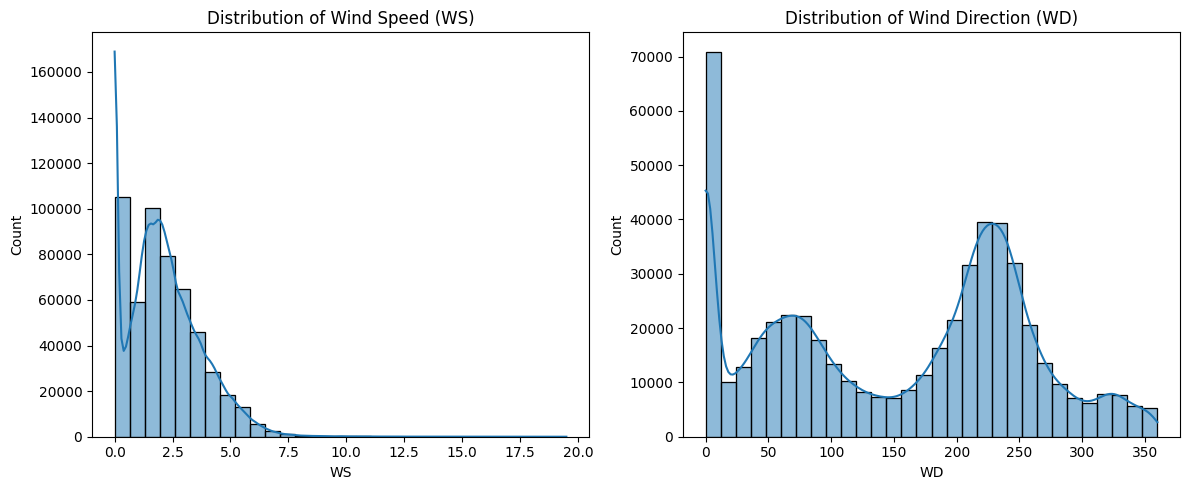

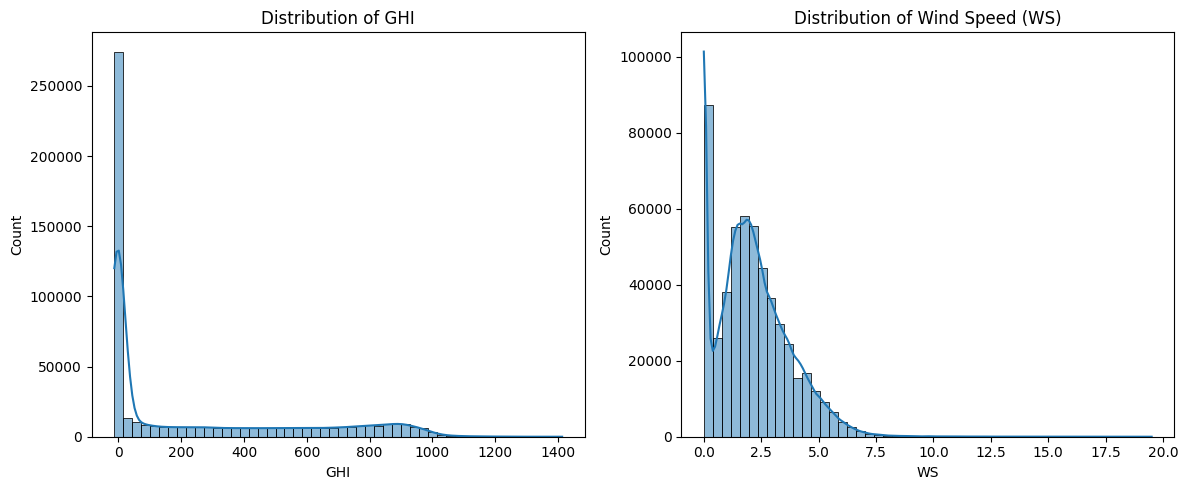

In [7]:
print("\n--- Wind & Distribution Analysis ---")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['WS'], bins=30, kde=True, ax=axes[0]).set_title('Distribution of Wind Speed (WS)')
sns.histplot(df['WD'], bins=30, kde=True, ax=axes[1]).set_title('Distribution of Wind Direction (WD)')
plt.tight_layout()
plt.show()

# --- Histograms for GHI and one other variable (e.g., WS) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['GHI'], bins=50, kde=True, ax=axes[0]).set_title('Distribution of GHI')
sns.histplot(df['WS'], bins=50, kde=True, ax=axes[1]).set_title('Distribution of Wind Speed (WS)')
plt.tight_layout()
plt.show()

## Temperature Analysis (REvisiting RH influence)


--- Temperature Analysis (RH Influence) ---


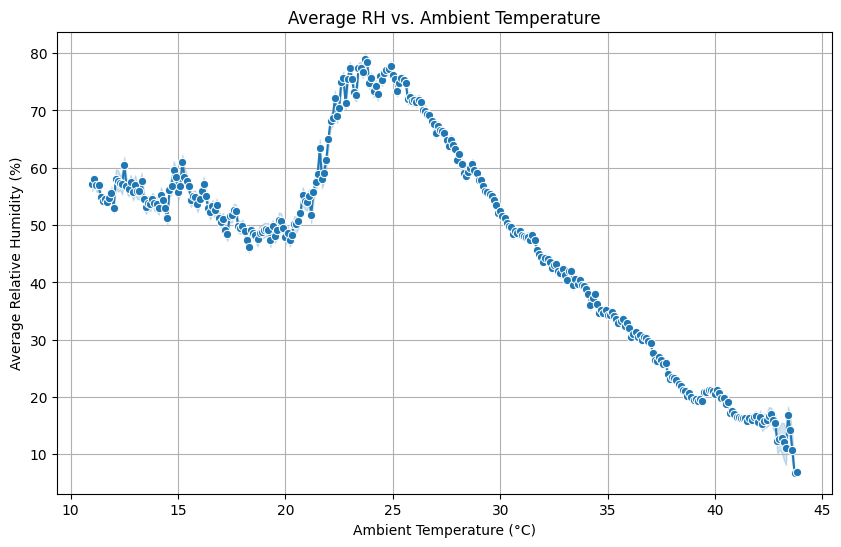

In [8]:
print("\n--- Temperature Analysis (RH Influence) ---")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Tamb', y='RH', marker='o', estimator='mean')
plt.title('Average RH vs. Ambient Temperature')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Average Relative Humidity (%)')
plt.grid(True)
plt.show()

## Bubble Chart


--- Bubble Chart: GHI vs. Tamb with Bubble Size = RH ---


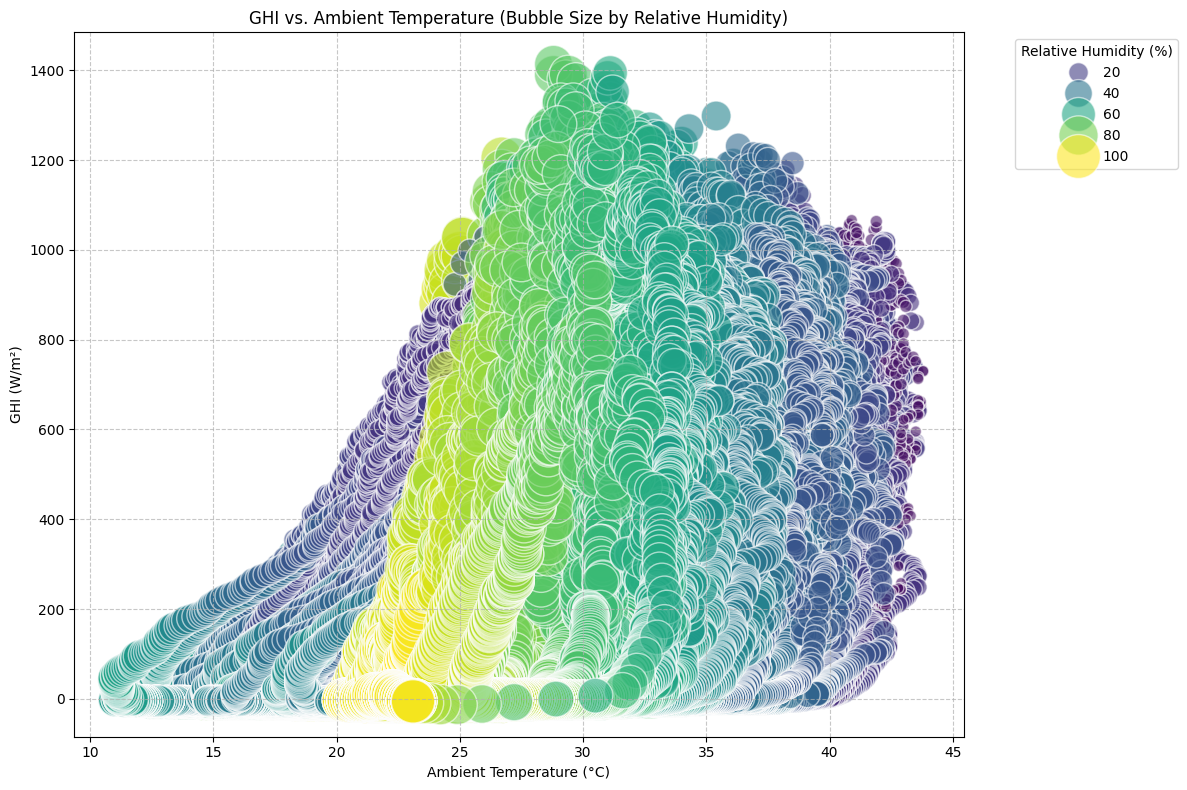

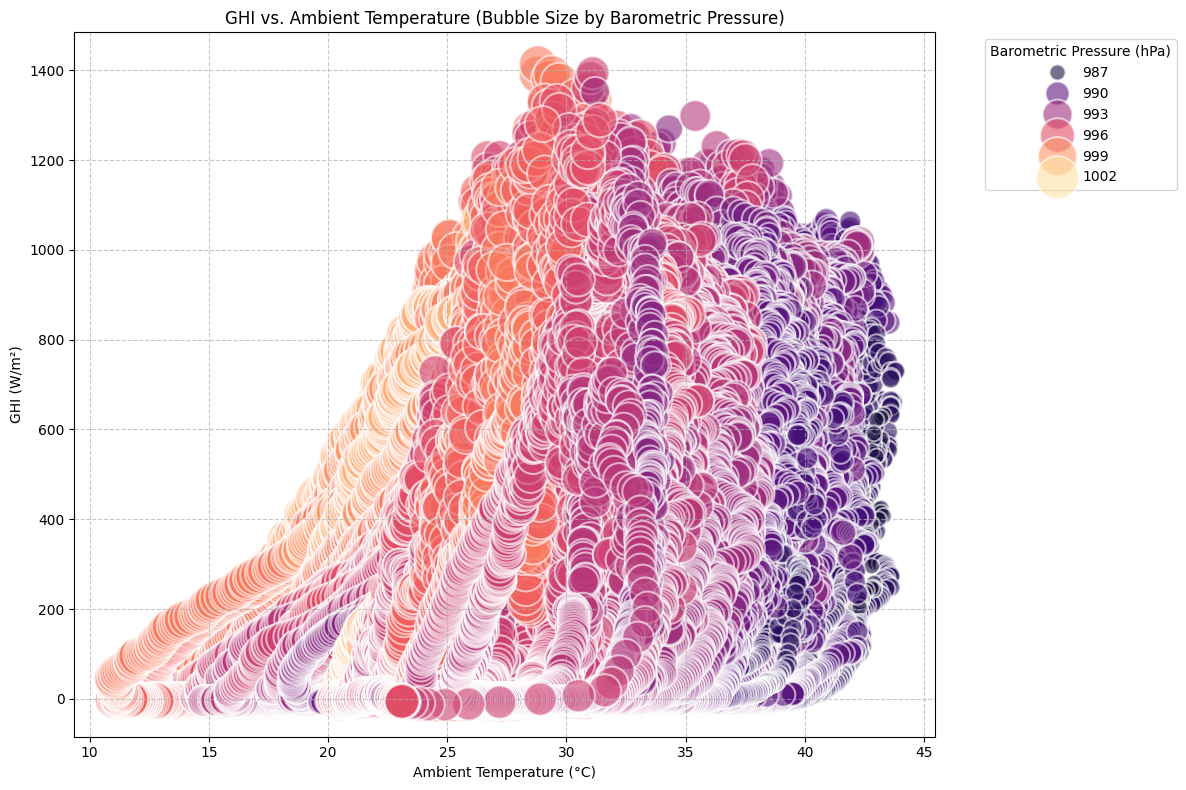

In [9]:
print("\n--- Bubble Chart: GHI vs. Tamb with Bubble Size = RH ---")

# Using seaborn for a clean bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH', hue='RH', sizes=(20, 1000), alpha=0.6, palette='viridis')
plt.title('GHI vs. Ambient Temperature (Bubble Size by Relative Humidity)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.legend(title='Relative Humidity (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Tamb', y='GHI', size='BP', hue='BP', sizes=(20, 1000), alpha=0.6, palette='magma')
plt.title('GHI vs. Ambient Temperature (Bubble Size by Barometric Pressure)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.legend(title='Barometric Pressure (hPa)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
